# Linear Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
np.random.seed(42)

#House area and price
num_samples = 100
house_area = np.random.randint(50, 200, num_samples)
house_price = 3000 * house_area + np.random.randint(0, 50000, num_samples)

#Pandas DataFrame
data = {'House Area (sqm)': house_area, 'House Price (USD)': house_price}
df = pd.DataFrame(data)

#X, y
X = df[['House Area (sqm)']].values
y = df[['House Price (USD)']].values

df.head(10)

,House Area (sqm),House Price (USD)
0,152,466965
1,142,450538
2,64,234530
3,156,473056
4,121,395482
5,70,257716
6,152,464110
7,171,526773
8,124,399266
9,137,428412


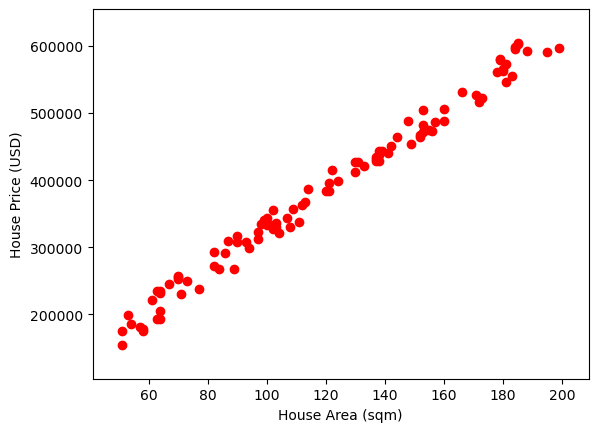

In [3]:
plt.plot(X, y, 'ro')
plt.axis([min(X) - 10, max(X) + 10, min(y) - 50000, max(y) + 50000])

#Label
plt.xlabel('House Area (sqm)')
plt.ylabel('House Price (USD)')

plt.show()

## 1. Linear Regression from scratch

| Equation | Python Code | Note |
|---|---|---|
| $\text{A} \triangleq \bar{\text{X}}^T \bar{\text{X}}$ | `np.dot(Xbar.T, Xbar)` |  |
| $\text{b} \triangleq \bar{\text{X}}^Ty$ | `np.dot(Xbar.T, y)` | |
| $\text{w} = \text{A}^\dagger \text{b}$ | `np.dot(np.linalg.pinv(A), b)` | $\text{A}^\dagger$ là nghịch đảo giả của $A$. |

In [4]:
#Xbar
bias = np.ones((X.shape[0], 1))
Xbar = np.concatenate((bias, X), axis = 1)

#Weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)

w

array([[29506.2873064 ],
       [ 2966.97709624]])

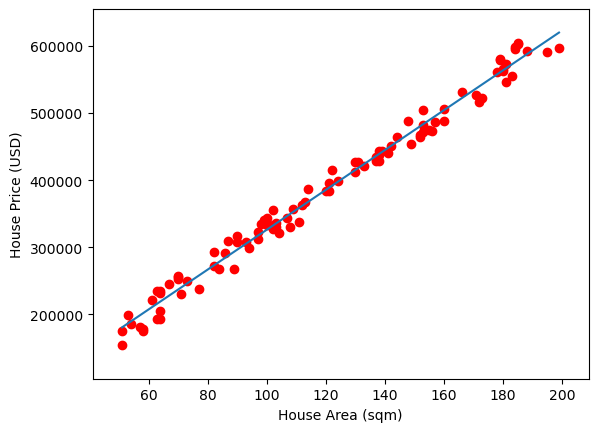

In [5]:
w_0 = w[0][0]
w_1 = w[1][0]
x0  = np.linspace(min(X), max(X), 2)
y0  = w_0 + w_1*x0

#Fitting line 
plt.plot(X.T, y.T, 'ro')       #data 
plt.plot(x0, y0)               #the fitting line
plt.axis([min(X) - 10, max(X) + 10, min(y) - 50000, max(y) + 50000])
plt.xlabel('House Area (sqm)')
plt.ylabel('House Price (USD)')
plt.show()


## 2. Scikit-learn

In [6]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print('Scikit-learn: ', regr.coef_ )
print('Manual: ', w.T)

Scikit-learn:  [[29506.2873064   2966.97709624]]
Manual:  [[29506.2873064   2966.97709624]]


****